BCB 546X: Python Assignment
Daniel Bun

 Here's the start of our Python script. Thanks for completing it for me! - Dr. X
 IMPORTANT: install BioPython so that this will work

In [41]:
#installing BioPython to this Juyper notebook
%pip install BioPython 
#installing pandas to this notebook
%pip install pandas 
#installing seaborn
%pip install seaborn

from Bio import SeqIO               #import SeqIO subpackage from BioPython to handle sequencing data
from Bio.Data import CodonTable     #Import CodonTable from BioPython for translation problems
import pandas as pd                 #import pandas as pd for using pandas
from Bio.Seq import Seq             ##import Seq commands/methods from biopython
import math                         #math for the gc calculations
from Bio.SeqUtils import gc_fraction #import from biopython sequencing utilities gc_fraction method
import seaborn as sns               #Import seaborn for plotting
import matplotlib.pyplot as plt     #import matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


1 
 
 Dr. X: this gets sequences 
 Please properly document this function in the Jupyter notebook 
 Your descriptions of all functions should contain information about what the function does,
 as well as information about the return types and arguments.

In [2]:
#1

#In this we are creating a function for getting sequences from a fasta file
def get_sequences_from_file(fasta_fn):                              #define function_name(input)
    sequence_data_dict = {}                                         #create a variable to store the sequence data to
    for record in SeqIO.parse(fasta_fn, "fasta"):                   #defining a loop that loops over each record in the fasta file given to it, biopython
        description = record.description.split()                    #Split the Fasta descriptions and store them into a variable
        species_name = description[1] + " " + description[2]        #Define species name as description 1 space description 2
        sequence_data_dict[species_name] = record.seq               #append the species name to the previously defined sequence_data_dict
    return(sequence_data_dict)                                      #Return the dictionary of species names

2
YOUR STRING-TRANSLATE FUNCTION 

In [17]:
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #load codon table to mito_table object to refer to
    Aminoacid_string = []                                                       #make object to store aminoacid string to
    for myI in range(0, len(string_nucleotides), 3):                            #create for loop for reading string 3nucleotides at a time                                 
        codon = string_nucleotides[myI:myI + 3]                                 #define codon object as every 3 nucleotides
        amino_acid = mito_table.forward_table.get(codon, "stop")                #translate codon to the respective amino acid
        if codon in mito_table.stop_codons:                                     #make if statement to check for stop codon
            break                                                               #if stop codon is found, do not keep reading
        else:                                                                   #else is used for when it is not a stop codon
            Aminoacid_string.append(amino_acid)                                 #which then keeps appending translated codons

    return(''.join(Aminoacid_string))                                           #return output amino acid string to show result

translate_function('ACCGTGACGTCATCGATCAGCATCAGCATCGACATCAGCACTACAGCATCACGATATACG') #test case

'TVTSSISISIDISTTASRYT'

3
YOUR ALTERNATIVE FUNCTION (USING BIOPYTHON)

In [23]:
def biotranslate(string_nucleotide):                                            #define function to translate
    aminoacid = Seq.translate(string_nucleotide, table=2,to_stop=True)          #create object to store biopython translation
    return aminoacid                                                            #return translated amino acid string

biotranslate('ACCGTGACGTCATCGATCAGCATCAGCATCGACATCAGCACTACAGCATCACGATATACG')    #test case

'TVTSSISISIDISTTASRYT'

4 YOUR COUNT AA ANALYSIS FUNCTION 

In [36]:

def AA_weight(seq): #define function to accept seq argument

  table = {                                                       #define a table for weights of amino acids
    'A':71.03711, 'B':71.03711, 'C':103.00919, 'D':115.02694,
    'E':129.04259, 'F':147.06841, 'G':57.02146, 'H':137.05891,
    'I':113.08406, 'K':128.09496, 'L':113.08406, 'M':131.04049,
    'N':114.04293, 'P':97.05276, 'Q':128.05858, 'R':156.10111,
    'S':87.03203, 'T':101.04768, 'V':99.06841, 'W':186.07931,
    'Y':163.06333
    }
  protein_weight = 0                                              #define protein variable as 0 so we can add to it
  for protein in seq:                                             #for loop to go through the sequence 1 letter at a time
      protein_weight = protein_weight + table[protein]            #protein weight gets added based on the weight that is read, then saved in protein add var
  return protein_weight                                           #return protein weight that is calculated

AA_weight('TVTSSISISIDISTTASRYT')                                 #testcase

2084.06372

5 YOUR GC CONTENT ANALYSIS FUNCTION

In [32]:
def gcpercent(dna):                         #define function
  count_g = dna.count('G')                  #count number of G using biopython dna.count                
  count_c = dna.count('C')                  #count number of C using biopython dna.count
  countGC = count_g + count_c               #count GC by adding the two counts of G and C together
  dnalen = len(dna)                         #Define length of DNA string to divide by
  gc_percent = countGC/dnalen * 100         #DIvide GC count by length of DNA multiply by 100 to get GC percentage
  return gc_percent                         #return GC percentage

gcpercent('ACCGTGACGTCATCGATCAGCATCAGCATCGACATCAGCACTACAGCATCACGATATACG') #test case
    

50.0

###   MAIN   ###

In [34]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") #use function from before to create dictionary of species
penguins_df = pd.read_csv("penguins_mass.csv")             #read penguin mass using read csv function from pandas
species_list = list(penguins_df.species)                   #species list is turned into a list

 6  
Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
 Set the value to 'NaN' to indicate that these cells are currently empty.

In [35]:
penguins_df['molecular weight'] = float('NaN')      #adding column through indexing and filling with NaN
penguins_df['GC_content'] = float('NaN')            #adding column through indexing and filling with NaN

print(penguins_df.head())                           #print test case to check

                   species   mass  molecular weight  GC_content
0     Aptenodytes forsteri  28.00               NaN         NaN
1  Aptenodytes patagonicus  13.40               NaN         NaN
2      Eudyptes chrysocome   2.80               NaN         NaN
3    Eudyptes chrysolophus   4.50               NaN         NaN
4        Eudyptes sclateri   4.25               NaN         NaN


7  Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content then appends to the dataframe

In [47]:
for key, value in cytb_seqs.items():                        #for loop start for dictionaries found in cytb_seqs
    penguins_df.loc[penguins_df.species == key, 'molecular_weight'] = AA_weight(str(translate_function(value))) #Use functions from before translate and calculate, then add molecular weight to the dictionaries
    penguins_df.loc[penguins_df.species == key, 'GC_content'] = gcpercent(value)  #Similar to above, take function from before, calculate GC percent and add to dictionaries
penguins_df

,species,mass,molecular weight,GC_content,molecular_weight
0,Aptenodytes forsteri,28.00,NaN,48.381452,42414.56267
1,Aptenodytes patagonicus,13.40,NaN,49.693788,42518.61003
2,Eudyptes chrysocome,2.80,NaN,51.181102,42430.75639
3,Eudyptes chrysolophus,4.50,NaN,50.918635,42400.74582
4,Eudyptes sclateri,4.25,NaN,50.831146,42430.75639
5,Eudyptula minor,1.60,NaN,49.256343,42446.73355
6,Pygoscelis adeliae,4.60,NaN,49.081365,42413.56741
7,Pygoscelis antarctica,4.10,NaN,47.769029,42359.52973
8,Pygoscelis papua,6.10,NaN,47.156605,42550.71302
9,Spheniscus demersus,3.20,NaN,48.293963,42386.53137


8
 
 Plot a bar-chart of the mass with the x-axes labeled with species names.
 
 *Q1* What is the smallest penguin species? 
 
 The smallest pengu is Eudyptula minor.
 
 *Q2* What is the geographical range of this species?

 Eudyptula minor or fairy penguin/little blue penguins/blue penguins are found in Australia and New Zealand https://en.wikipedia.org/wiki/Little_penguin 

In [ ]:
#set plots to display in the notebook
%matplotlib inline 

C:\Users\danie\AppData\Local\Temp\ipykernel_31356\1025918607.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=penguins_df, x='species', y='mass', palette=my_palette)
C:\Users\danie\AppData\Local\Temp\ipykernel_31356\1025918607.py:3: UserWarning: 
The palette list has fewer values (8) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=penguins_df, x='species', y='mass', palette=my_palette)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Aptenodytes forsteri'),
  Text(1, 0, 'Aptenodytes patagonicus'),
  Text(2, 0, 'Eudyptes chrysocome'),
  Text(3, 0, 'Eudyptes chrysolophus'),
  Text(4, 0, 'Eudyptes sclateri'),
  Text(5, 0, 'Eudyptula minor'),
  Text(6, 0, 'Pygoscelis adeliae'),
  Text(7, 0, 'Pygoscelis antarctica'),
  Text(8, 0, 'Pygoscelis papua'),
  Text(9, 0, 'Spheniscus demersus'),
  Text(10, 0, 'Spheniscus humboldti'),
  Text(11, 0, 'Spheniscus magellanicus')])

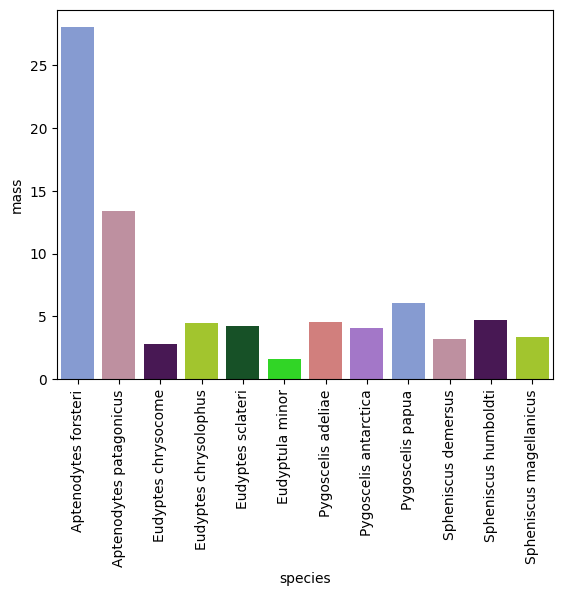

In [44]:
my_palette = ["#7995de", "#c6889d", "#4e0e5e", "#afde15", "#0e5a22", "#17f209", "#df726f", "#a469d6"] #creating a colour palette to use for the graph

sns.barplot(data=penguins_df, x='species', y='mass', palette=my_palette)   #Create barplot using seaborn for penguin data vs mass
plt.xticks(rotation=90)                                                    #rotate the labels so that it is readable

9
Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).


<Axes: xlabel='GC_content', ylabel='molecular_weight'>

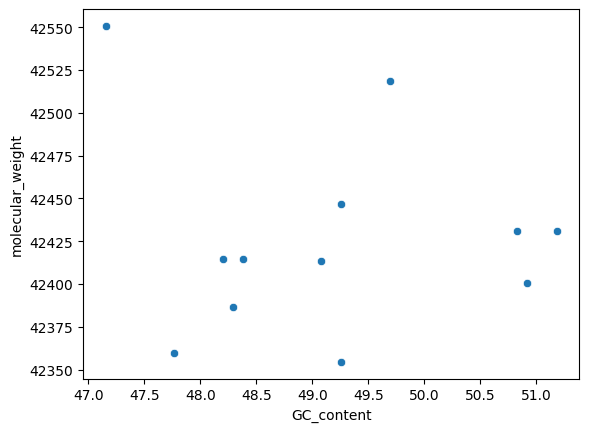

In [46]:
sns.scatterplot(data=penguins_df, x = 'GC_content', y='molecular_weight')   #Plot scatterplot using seaborn for GC content vs moelcualr weight

10
Save the new DataFrame to a file called "penguins_mass_cytb.csv"

In [48]:
penguins_df.to_csv("penguins_mass_cytb.csv") #saving as a .csv file.